Data yang dibuthkan :
*   randomdata.csv
*   dataset.csv
*   SW_tambahan.txt
*   normal_list.txt



Install pySastrawi dan download stopwords NLTK

In [ ]:
!pip install PySastrawi
import nltk
nltk.download('stopwords')

     |████████████████████████████████| 215kB 5.4MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Import Library

In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

additional_stopwords = "SW_tambahan.txt"
normalization_list = "normal_list.txt"

#NORMLIZER
normal_d = {}
with open(normalization_list,'r') as f:
  for line in f:
    line = line.strip('\n')
    line = line.split(' ')
    kunci = line[0]
    nilai = line[1]
    normal_d[kunci] = nilai

#STEMMER
stemfactory = StemmerFactory()
stemmer = stemfactory.create_stemmer()

#STOPWORDS SETTING
indo_SW_NLTK = set(stopwords.words('indonesian'))
stopword_tambahan = []
with open(additional_stopwords,'r') as f:
  for line in f:
    line = line.strip()
    stopword_tambahan.append(line) 
for i in indo_SW_NLTK:
  kata = i
  stopword_tambahan.append(i)
stopword_all = StopWordRemoverFactory().get_stop_words() + stopword_tambahan

preprocessing

In [ ]:
data=pd.read_csv('randomdata.csv')
data['cleared_text']=' '
data['class']=0
for i in range(len(data)):
  print("Memproses data index ke-",i)
  teks = data['text'][i]
  rating = data['rating'][i]
  print("Mengecilkan huruf...")
  teks = teks.lower()
  print("Mengilangkan angka...")
  teks = re.sub(r"\d+", "", teks)
  print("Tokenizing...")
  teks = teks.split()

  print("Menormalisasi kata...")
  #NORMALISASI
  tmp =[]
  for j in teks:
    try: a = normal_d[j]
    except : a=j
    finally: tmp.append(a)
  teks = tmp

  print("Menghapus Stopwords...")
  #STOPWORDS
  teks = [word for word in teks if not word in stopword_all]

  print("Memulai Stemming...")
  #STEMMING
  teks = ' '.join(teks)
  teks = stemmer.stem(teks)
  
  if rating==1:
    klas = 5
  elif rating==2:
    klas = 4
  elif rating==3:
    klas = 3
  elif rating==4:
    klas = 2
  elif rating==5:
    klas = 1
  else :
    klas = 0

  print("Menyimpan...")
  data['cleared_text'][i]=teks
  data['class'][i]=klas
  print("Data index ke-",i," berhasil diproses.")
  print()

print("preprocessing selesai.")

Memproses data index ke- 0
Mengecilkan huruf...
Mengilangkan angka...
Tokenizing...
Menormalisasi kata...
Menghapus Stopwords...
Memulai Stemming...
Menyimpan...
Data index ke- 0  berhasil diproses.

Memproses data index ke- 1
Mengecilkan huruf...
Mengilangkan angka...
Tokenizing...
Menormalisasi kata...
Menghapus Stopwords...
Memulai Stemming...
Menyimpan...
Data index ke- 1  berhasil diproses.

Memproses data index ke- 2
Mengecilkan huruf...
Mengilangkan angka...
Tokenizing...
Menormalisasi kata...
Menghapus Stopwords...
Memulai Stemming...
Menyimpan...
Data index ke- 2  berhasil diproses.

Memproses data index ke- 3
Mengecilkan huruf...
Mengilangkan angka...
Tokenizing...
Menormalisasi kata...
Menghapus Stopwords...
Memulai Stemming...
Menyimpan...
Data index ke- 3  berhasil diproses.

Memproses data index ke- 4
Mengecilkan huruf...
Mengilangkan angka...
Tokenizing...
Menormalisasi kata...
Menghapus Stopwords...
Memulai Stemming...
Menyimpan...
Data index ke- 4  berhasil diproses.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bag Of Word dan Matriks

Isi variabel y_test : 
 [5 2 4 3 1]

Isi variabel y_pred : 
 [2 2 4 3 1]

nilai akurasi :  0.8
persentase akurasi :  80.0 %

Confusion Matrix


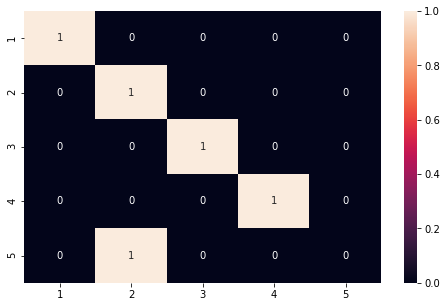

In [ ]:
data_train = pd.read_csv("dataset.csv")
data_test = data.drop(['text','file_name','rating'],axis=1)

#MEMBUAT MODEL BAG OF WORDS
cv = CountVectorizer()
X_train = cv.fit_transform(data_train['clear_text']).toarray()
Y_train = data_train.iloc[:,1].values
X_test = cv.transform(data_test['cleared_text']).toarray()
Y_test = data_test.iloc[:,1].values

# Metode Random Forest

classifier = RandomForestClassifier(n_estimators = 5, random_state=0)
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test) 

print("Isi variabel y_test : \n",Y_test)
print()
print("Isi variabel y_pred : \n",y_pred)
print()
print("nilai akurasi : ",accuracy_score(Y_test, y_pred))
print("persentase akurasi : ",accuracy_score(Y_test, y_pred)*100,"%")
print()

cm = confusion_matrix(Y_test, y_pred)
#print(cm)

angka=0
class_names=[]
for i in range(6):
  if i in Y_test:
    class_names.append(i)

print("Confusion Matrix")
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True)
tick_marks = np.arange(len(class_names))+0.5
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.show()

In [ ]:
'''
classifier.estimators_
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn import tree
plt.figure(figsize=(15,10))
for i in range(len(classifier.estimators_)):
  tree.plot_tree(classifier.estimators_[i],filled=True)
'''

'\nclassifier.estimators_\nfrom sklearn.tree import export_graphviz\nfrom graphviz import Source\nfrom sklearn import tree\nplt.figure(figsize=(15,10))\nfor i in range(len(classifier.estimators_)):\n  tree.plot_tree(classifier.estimators_[i],filled=True)\n'